In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [4]:
fnames = glob.glob('/data2/GBT/3C295/OnOff/*/*A*rfireduced.npz')
fnames.sort()
print len(fnames)

8


In [5]:
fnames

['/data2/GBT/3C295/OnOff/scan_01_007.raw.vegas/scan_01_007.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_01_008.raw.vegas/scan_01_008.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_01_039.raw.vegas/scan_01_039.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_01_040.raw.vegas/scan_01_040.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_02_006.raw.vegas/scan_02_006.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_02_007.raw.vegas/scan_02_007.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_03_006.raw.vegas/scan_03_006.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan_03_007.raw.vegas/scan_03_007.raw.vegas.A.fits.rfireduced.npz']

In [6]:
nz = np.load(fnames[0])

In [12]:
mask = nz['valid']
xxoff = nz['xxoff'][200:, mask]
msdata = xxoff - np.mean(xxoff, 0)

In [8]:
xxoff.shape

(1231, 427)

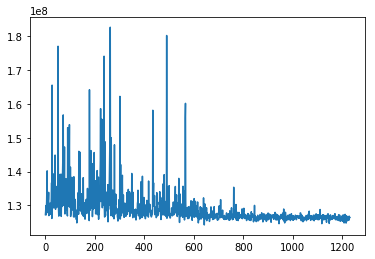

In [9]:
plot(xxoff[:, 100])

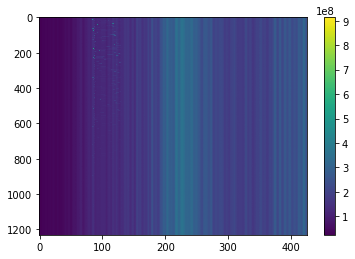

In [10]:
imshow(xxoff, aspect='auto')
colorbar()

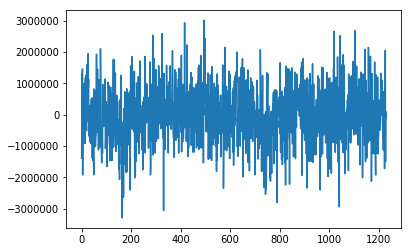

In [13]:
plot(msdata[:, 280])

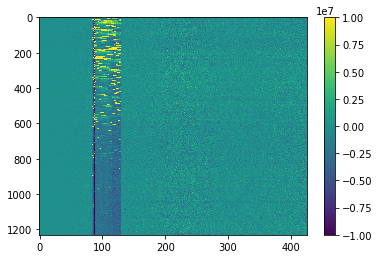

In [14]:
imshow(msdata, aspect='auto')
colorbar()
clim(-1.e7, 1.e7)

In [96]:
power = []
for k in range(msdata.shape[1]):
    x = np.fft.rfft(msdata[:, k])
    power.append((x * x.conj()).real)
power = np.array(power).T

In [97]:
power.shape

(616, 427)

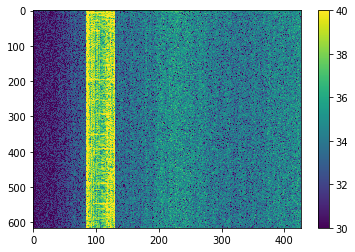

In [101]:
imshow(np.log(power), aspect='auto')
colorbar()
clim(30, 40)